### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

### Data Understanding

In [2]:
#loading the dataset
df = pd.read_csv("shamiri_imputed_dataset.csv")
df.head()

,ParticipantID,PHQ1,PHQ2,PHQ3,PHQ4,PHQ5,PHQ6,PHQ7,PHQ8,GAD1,...,MSSS8,MSSS9,MSSS10,MSSS11,MSSS12,Tribe,Gender,School,Age,School_Resources
0,SR_001,3,0,2,1,1,1,3,1,1,...,7,6,7,6,6,Minority,M,Starays,18.0,Poor
1,SR_002,3,0,1,0,0,1,2,2,0,...,7,5,7,3,6,Minority,M,Starays,16.0,Poor
2,SR_003,2,3,0,1,2,3,1,2,0,...,5,2,2,5,5,Minority,F,Starays,14.0,Poor
3,SR_004,1,3,1,1,2,1,3,1,3,...,4,4,5,4,3,Minority,M,Starays,20.0,Poor
4,SR_005,1,1,0,1,0,3,3,0,1,...,6,6,2,6,2,Minority,M,Starays,18.0,Poor


In [3]:
#checking the shape
df.shape

(658, 33)

In [4]:
#checking columns
df.columns

Index(['ParticipantID', 'PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7',
       'PHQ8', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'MSSS1',
       'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9',
       'MSSS10', 'MSSS11', 'MSSS12', 'Tribe', 'Gender', 'School', 'Age',
       'School_Resources'],
      dtype='object')

### Data Cleaning

In [5]:
#Missing Values
df.isnull().sum()

ParticipantID       0
PHQ1                0
PHQ2                0
PHQ3                0
PHQ4                0
PHQ5                0
PHQ6                0
PHQ7                0
PHQ8                0
GAD1                0
GAD2                0
GAD3                0
GAD4                0
GAD5                0
GAD6                0
GAD7                0
MSSS1               0
MSSS2               0
MSSS3               0
MSSS4               0
MSSS5               0
MSSS6               0
MSSS7               0
MSSS8               0
MSSS9               0
MSSS10              0
MSSS11              0
MSSS12              0
Tribe               0
Gender              0
School              0
Age                 0
School_Resources    0
dtype: int64

In [7]:
#duplicates
df.duplicated().sum()

0

### Statistical Orverview Of Data

In [9]:
#Mean Age
df.Age.mean()

15.847264437689969

In [144]:
#value count of age
df.Age.sort_values(ascending= True).value_counts().head(20)

16.0    199
15.0    179
17.0    117
14.0     84
18.0     42
19.0     15
13.0     13
20.0      3
25.0      1
23.0      1
22.0      1
21.0      1
20.5      1
12.0      1
Name: Age, dtype: int64

In [14]:
#value count of Gender
df.Gender.value_counts()

F    338
M    320
Name: Gender, dtype: int64

### EDA And Insights

##### Visual Of Gender

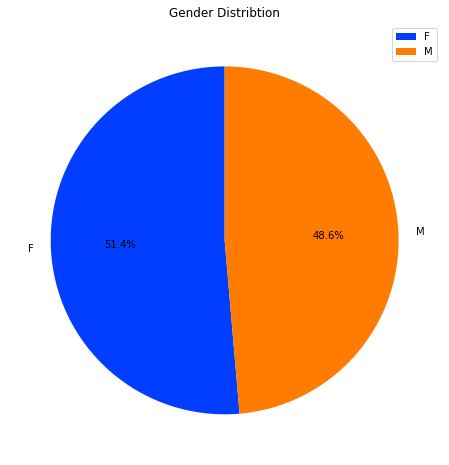

In [31]:
gender_counts = df.Gender.value_counts()
plt.figure(figsize=(8,8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
plt.legend(labels=gender_counts.index)
plt.title("Gender Distribtion")
plt.show()

##### Visual Of tribe count

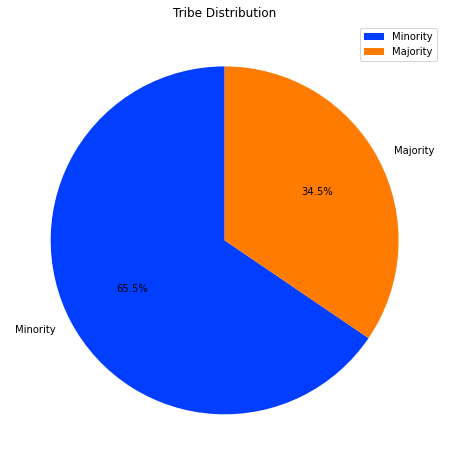

In [40]:
tribe_counts = df.Tribe.value_counts()
plt.figure(figsize=(8,8))
plt.pie(tribe_counts, labels=tribe_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('bright'))
plt.legend(labels=tribe_counts.index)
plt.title("Tribe Distribution")
plt.show()

##### Visual of school represnentation

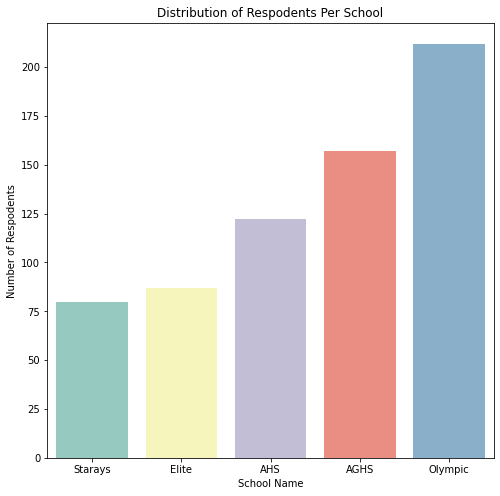

In [37]:
#school_counts = df.School.value_counts()
plt.figure(figsize=(8,8))
sns.countplot(data=df, x="School", palette="Set3")
#plt.legend(labels = school_counts.index)
plt.xlabel("School Name")
plt.ylabel("Number of Respodents")
plt.title("Distribution of Respodents Per School")
plt.show()

#### Visual of School resources distribution

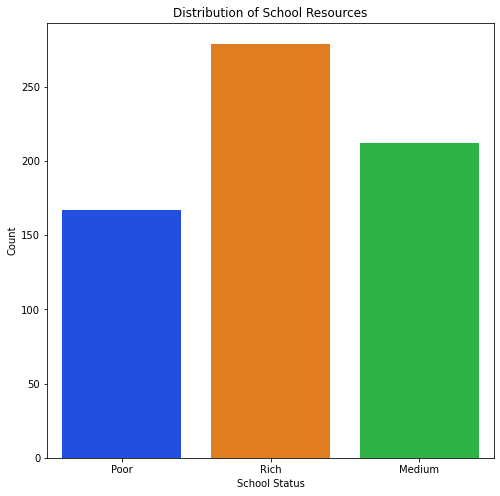

In [47]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x="School_Resources", palette="bright")
plt.xlabel("School Status")
plt.ylabel("Count")
plt.title("Distribution of School Resources")
plt.show()

## Insights

### BoxPlot for Age

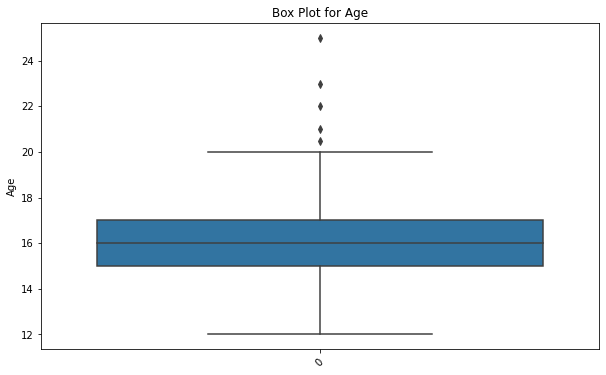

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.Age)
plt.title('Box Plot for Age')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

### BoxPlot for PHQ 

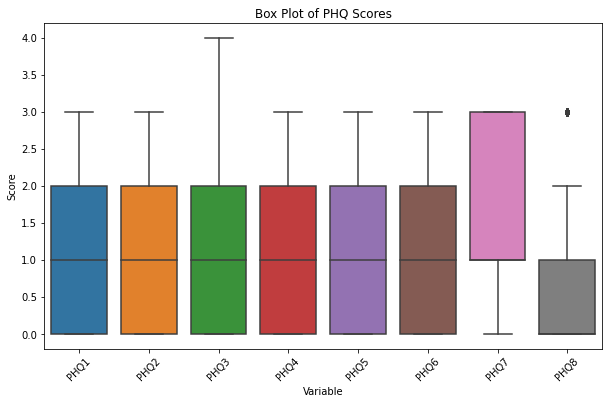

In [80]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 1:9])
plt.title('Box Plot of PHQ Scores')
plt.xlabel('Variable')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Correlation for each question  heatmap

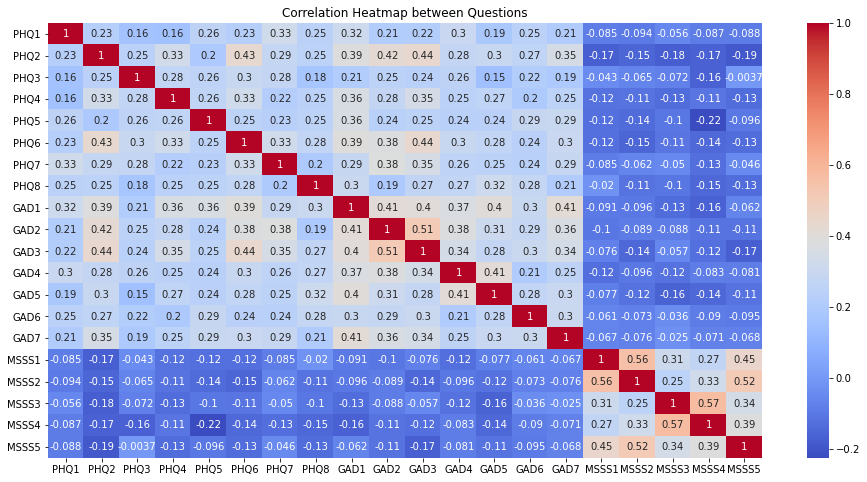

In [57]:
corr_matrix = df.iloc[ : , 1:21].corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap between Questions")
plt.show()

### Barplot for GAD Score

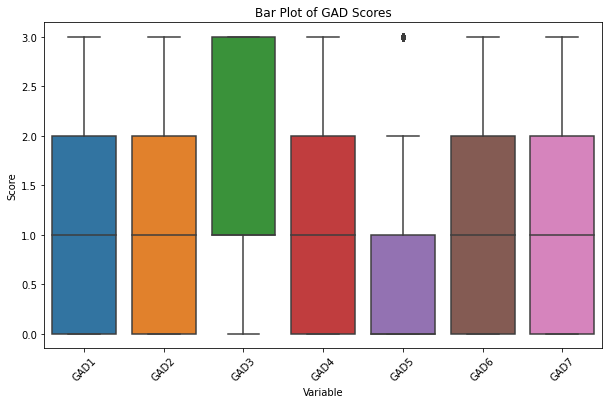

In [147]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 9:16])
plt.title('Bar Plot of GAD Scores')
plt.xlabel('Variable')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### Bar Plot for MSSS score

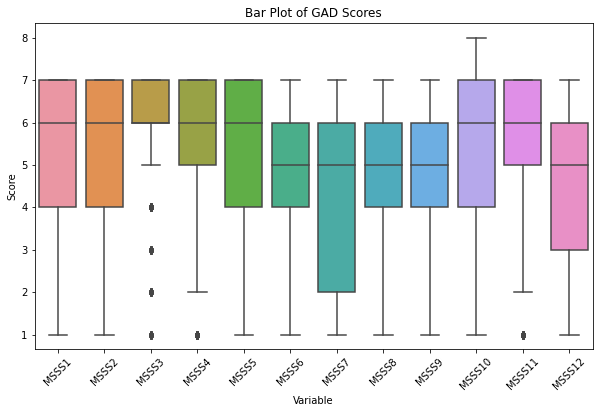

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 16:29])
plt.title('Bar Plot of GAD Scores')
plt.xlabel('Variable')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

### PHQ by School

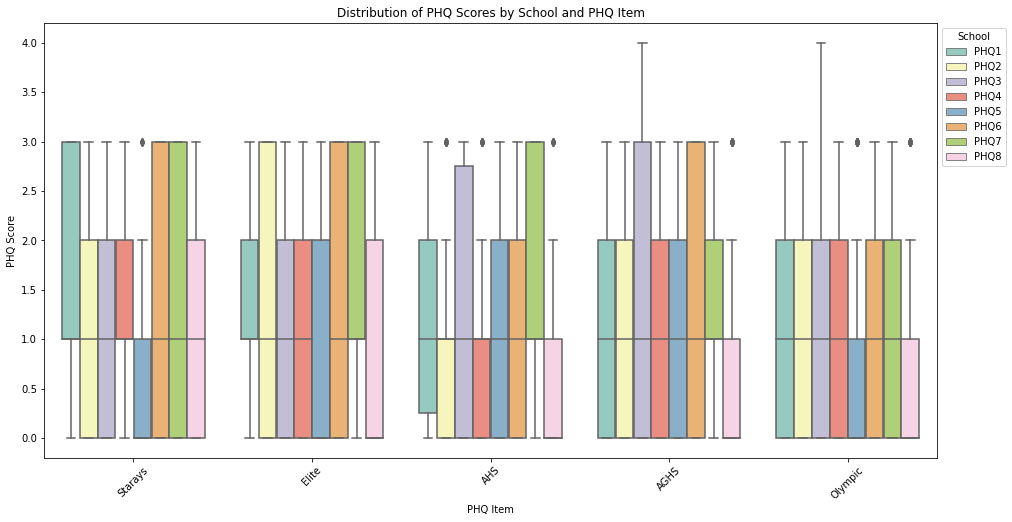

In [105]:
melted_df = df.melt(id_vars=['School'], value_vars=['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8'],
                    var_name='PHQ_Item', value_name='PHQ_Score')

# Create a box plot of PHQ scores by school and PHQ item
plt.figure(figsize=(16, 8))
sns.boxplot(data=melted_df, x='School', y='PHQ_Score', hue='PHQ_Item', palette='Set3')
plt.title('Distribution of PHQ Scores by School and PHQ Item')
plt.xlabel('PHQ Item')
plt.ylabel('PHQ Score')
plt.legend(title='School',bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

### GADS by School

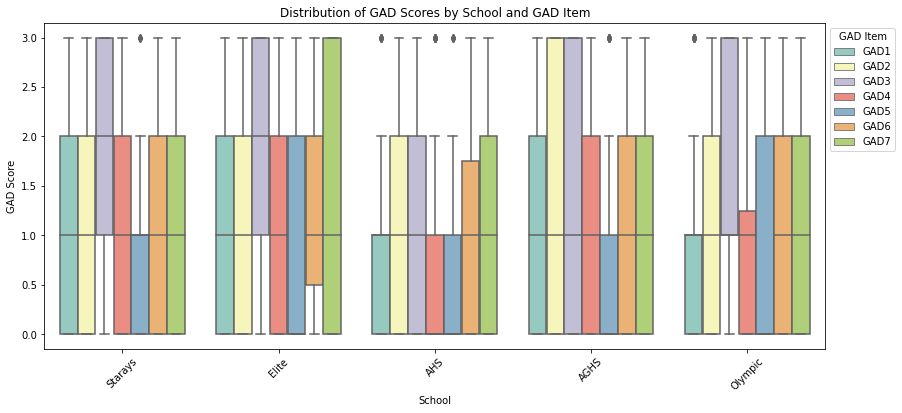

In [106]:
melted_df = df.melt(id_vars=['School'], value_vars=['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7'],
                    var_name='GAD_Item', value_name='GAD_Score')

# Create a box plot of GAD scores by school and GAD item
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x='School', y='GAD_Score', hue='GAD_Item', palette='Set3')
plt.title('Distribution of GAD Scores by School and GAD Item')
plt.xlabel('School')
plt.ylabel('GAD Score')
plt.legend(title='GAD Item', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

### MSSS By School Resources

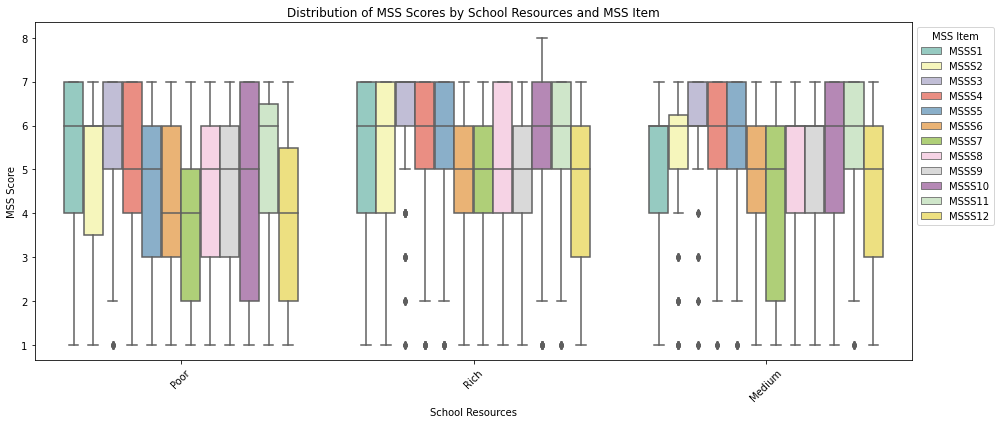

In [112]:
melted_df = df.melt(id_vars=['School_Resources'], value_vars=['MSSS1', 'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12'],
                    var_name='MSS_Item', value_name='MSS_Score')

# Create a box plot of MSS scores by school resources and MSS item
plt.figure(figsize=(14, 6))
sns.boxplot(data=melted_df, x='School_Resources', y='MSS_Score', hue='MSS_Item', palette='Set3')
plt.title('Distribution of MSS Scores by School Resources and MSS Item')
plt.xlabel('School Resources')
plt.ylabel('MSS Score')
plt.legend(title='MSS Item',bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

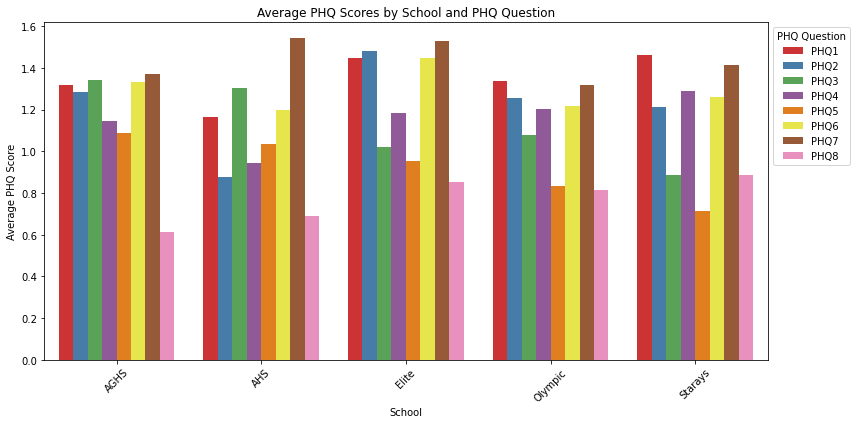

In [148]:
grouped_df = df.groupby('School')[['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8']].mean()

# Reset index to convert the groupby result back to a DataFrame
grouped_df = grouped_df.reset_index()

# Melt the grouped DataFrame for easier visualization
melted_df = grouped_df.melt(id_vars=['School'], value_vars=['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8'],
                            var_name='PHQ_Question', value_name='Average_PHQ_Score')

# Create a bar plot of average PHQ scores by school and PHQ item
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='School', y='Average_PHQ_Score', hue='PHQ_Question', ci=None, palette='Set1')
plt.title('Average PHQ Scores by School and PHQ Question')
plt.xlabel('School')
plt.ylabel('Average PHQ Score')
plt.legend(title='PHQ Question', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

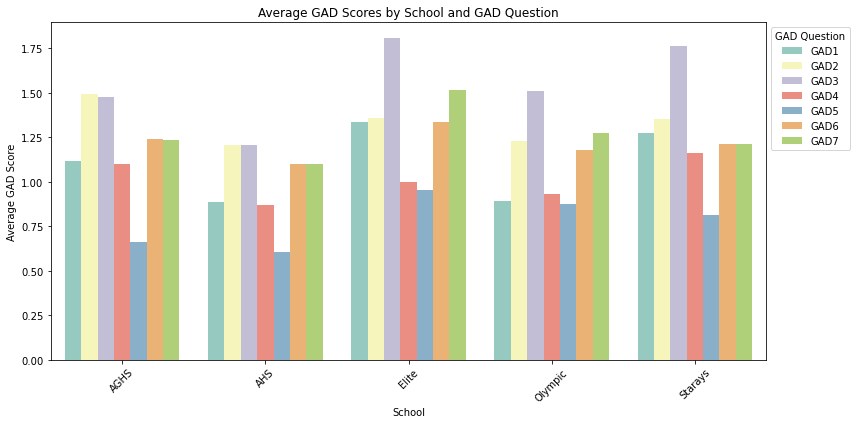

In [150]:
# Group by school and calculate the mean GAD scores
grouped_df = df.groupby('School')[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].mean()

# Reset index to convert the groupby result back to a DataFrame
grouped_df = grouped_df.reset_index()

# Melt the grouped DataFrame for easier visualization
melted_df = grouped_df.melt(id_vars=['School'], value_vars=['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7'],
                            var_name='GAD_Question', value_name='Average_GAD_Score')

# Create a bar plot of average GAD scores by school and GAD item
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='School', y='Average_GAD_Score', hue='GAD_Question', ci=None, palette='Set3')
plt.title('Average GAD Scores by School and GAD Question')
plt.xlabel('School')
plt.ylabel('Average GAD Score')
plt.legend(title='GAD Question', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

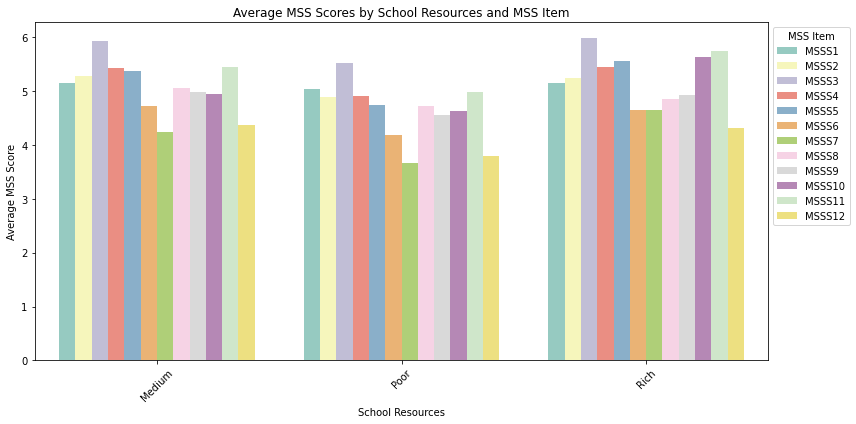

In [122]:
# Group by School Resources and calculate the mean MSS scores
grouped_df = df.groupby('School_Resources')[['MSSS1', 'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12']].mean()

# Reset index to convert the groupby result back to a DataFrame
grouped_df = grouped_df.reset_index()

# Melt the grouped DataFrame for easier visualization
melted_df = grouped_df.melt(id_vars=['School_Resources'], value_vars=['MSSS1', 'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12'],
                            var_name='MSS_Item', value_name='Average_MSS_Score')

# Create a bar plot of average MSS scores by school resources and MSS item
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='School_Resources', y='Average_MSS_Score', hue='MSS_Item', ci=None, palette='Set3')
plt.title('Average MSS Scores by School Resources and MSS Item')
plt.xlabel('School Resources')
plt.ylabel('Average MSS Score')
plt.legend(title='MSS Item', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gender

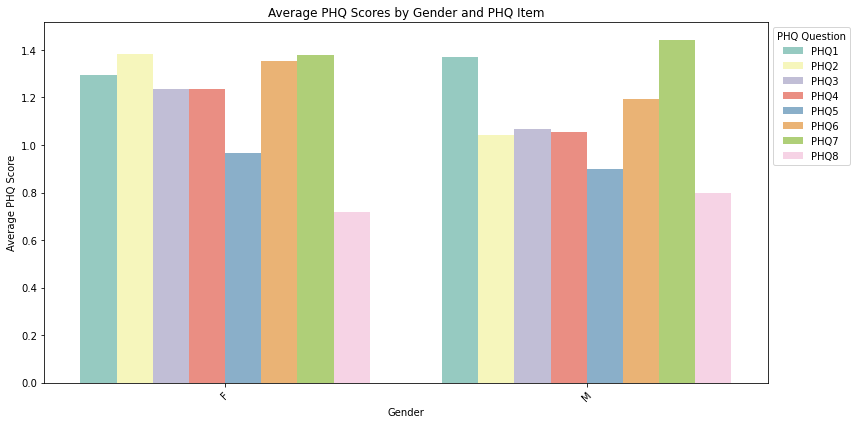

In [151]:
# Group by Gender and calculate the mean PHQ scores
grouped_df = df.groupby('Gender')[['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8']].mean()

# Reset index to convert the groupby result back to a DataFrame
grouped_df = grouped_df.reset_index()

# Melt the grouped DataFrame for easier visualization
melted_df = grouped_df.melt(id_vars=['Gender'], value_vars=['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8'],
                            var_name='PHQ_Question', value_name='Average_PHQ_Score')

# Create a bar plot of average PHQ scores by gender and PHQ item
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Gender', y='Average_PHQ_Score', hue='PHQ_Question', ci=None, palette='Set3')
plt.title('Average PHQ Scores by Gender and PHQ Item')
plt.xlabel('Gender')
plt.ylabel('Average PHQ Score')
plt.legend(title='PHQ Question', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2

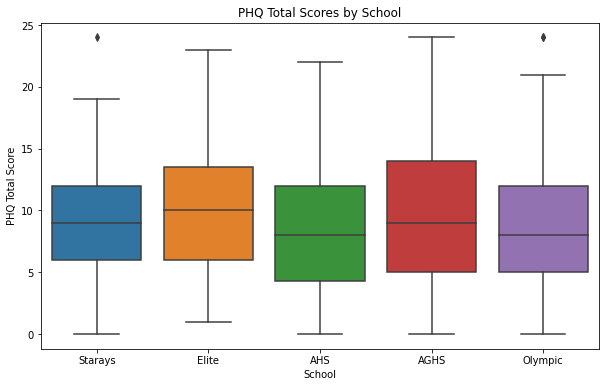

In [127]:
df['PHQ_Total'] = df[['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8']].sum(axis=1)
df['MSSS_Total'] = df[['MSSS1', 'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12']].sum(axis=1)
df['GAD_Total'] = df[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)
plt.figure(figsize=(10, 6))
sns.boxplot(x='School', y='PHQ_Total', data=df)
plt.title('PHQ Total Scores by School')
plt.xlabel('School')
plt.ylabel('PHQ Total Score')
plt.show()

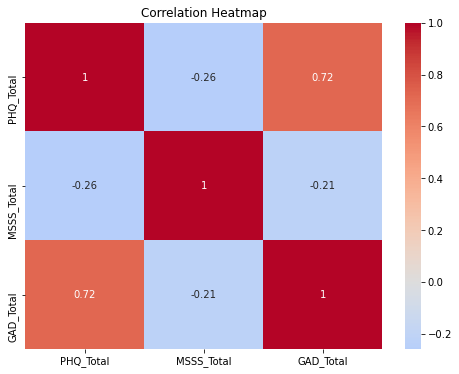

In [128]:
# 2. Correlation Heatmap
correlation_matrix = df[['PHQ_Total', 'MSSS_Total', 'GAD_Total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

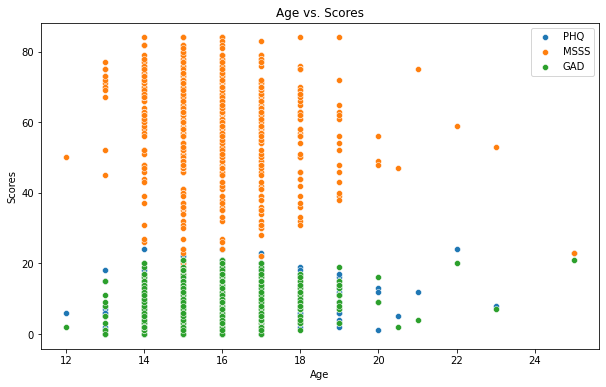

In [129]:
# 3. Age vs. PHQ/Mss/GAD Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='PHQ_Total', data=df, label='PHQ')
sns.scatterplot(x='Age', y='MSSS_Total', data=df, label='MSSS')
sns.scatterplot(x='Age', y='GAD_Total', data=df, label='GAD')
plt.title('Age vs. Scores')
plt.xlabel('Age')
plt.ylabel('Scores')
plt.legend()
plt.show()

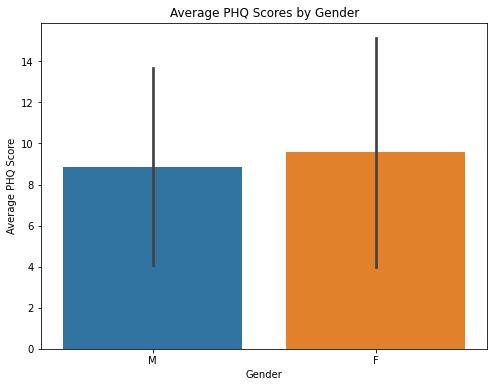

In [132]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='PHQ_Total', data=df, ci='sd')
plt.title('Average PHQ Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average PHQ Score')
plt.show()

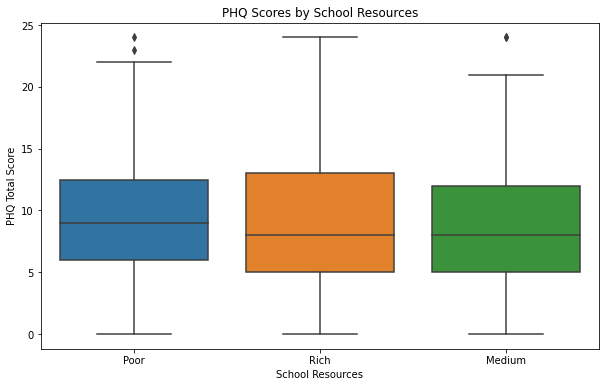

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='School_Resources', y='PHQ_Total', data=df)
plt.title('PHQ Scores by School Resources')
plt.xlabel('School Resources')
plt.ylabel('PHQ Total Score')
plt.show()

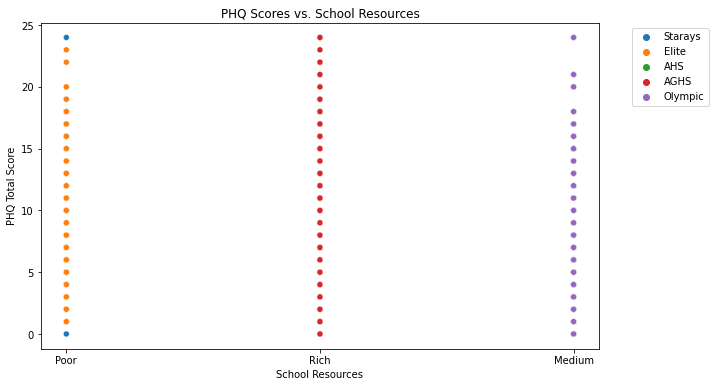

In [134]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='School_Resources', y='PHQ_Total', hue='School', data=df)
plt.title('PHQ Scores vs. School Resources')
plt.xlabel('School Resources')
plt.ylabel('PHQ Total Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

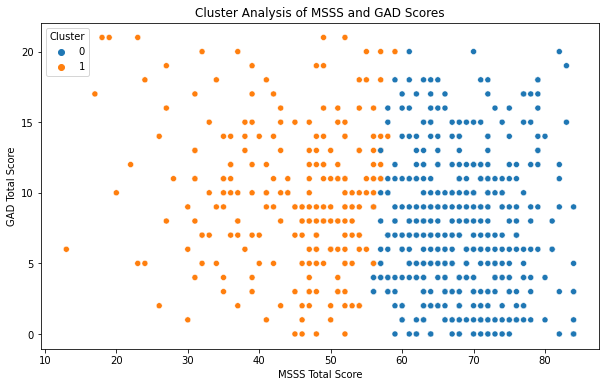

In [140]:
from sklearn.cluster import KMeans
cluster_data = df[['PHQ_Total', 'MSSS_Total', 'GAD_Total']]
kmeans = KMeans(n_clusters=2)  # Change the number of clusters as needed
df['Cluster'] = kmeans.fit_predict(cluster_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MSSS_Total', y='GAD_Total', hue='Cluster', data=df)
plt.title('Cluster Analysis of MSSS and GAD Scores')
plt.xlabel('MSSS Total Score')
plt.ylabel('GAD Total Score')
plt.show()

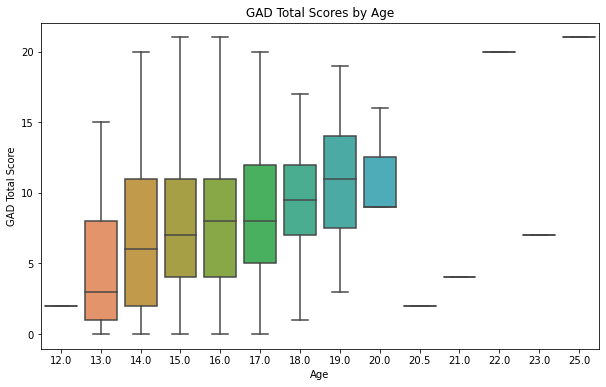

In [156]:
df['GAD_Total'] = df[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)

# Create a scatter plot for GAD total scores by age
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='GAD_Total', data=df)
plt.title('GAD Total Scores by Age')
plt.xlabel('Age')
plt.ylabel('GAD Total Score')
plt.show()

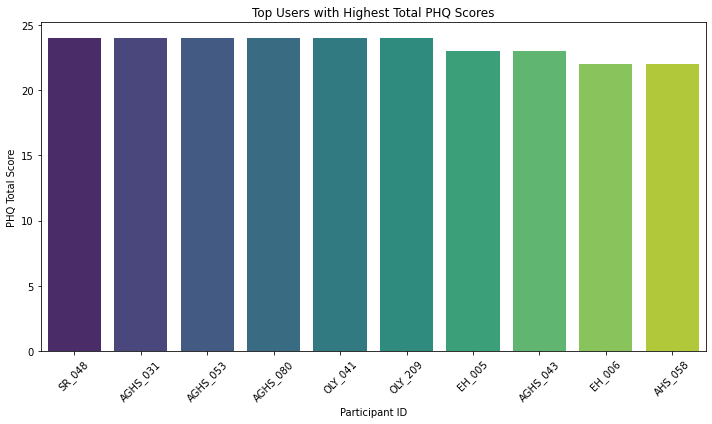

In [158]:
# Calculate PHQ total scores
df['PHQ_Total'] = df[['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8']].sum(axis=1)

# Select the top users with highest PHQ scores
top_users = df.nlargest(10, 'PHQ_Total')  # Change the number of top users as needed

# Create a bar plot for the top users with highest PHQ scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ParticipantID', y='PHQ_Total', data=top_users, palette='viridis')
plt.title('Top Users with Highest Total PHQ Scores')
plt.xlabel('Participant ID')
plt.ylabel('PHQ Total Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

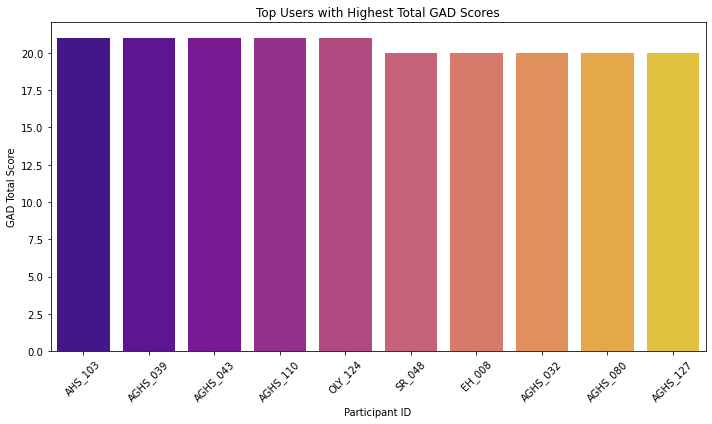

In [161]:
df['GAD_Total'] = df[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)

# Select the top users with highest GAD scores
top_users_gad = df.nlargest(10, 'GAD_Total')  # Change the number of top users as needed

# Create a bar plot for the top users with highest GAD scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ParticipantID', y='GAD_Total', data=top_users_gad, palette='plasma')
plt.title('Top Users with Highest Total GAD Scores')
plt.xlabel('Participant ID')
plt.ylabel('GAD Total Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

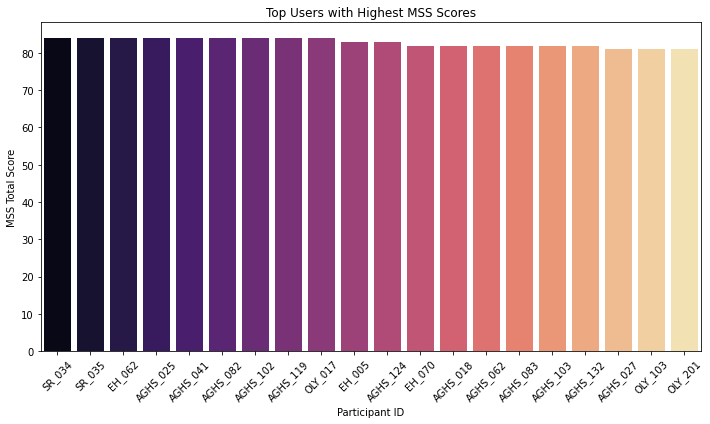

In [163]:
df['MSSS_Total'] = df[['MSSS1', 'MSSS2', 'MSSS3', 'MSSS4', 'MSSS5', 'MSSS6', 'MSSS7', 'MSSS8', 'MSSS9', 'MSSS10', 'MSSS11', 'MSSS12']].sum(axis=1)

# Select the top users with highest MSS scores
top_users_mss = df.nlargest(20, 'MSSS_Total')  # Change the number of top users as needed

# Create a bar plot for the top users with highest MSS scores
plt.figure(figsize=(10, 6))
sns.barplot(x='ParticipantID', y='MSSS_Total', data=top_users_mss, palette='magma')
plt.title('Top  with Highest MSS Scores')
plt.xlabel('Participant ID')
plt.ylabel('MSS Total Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

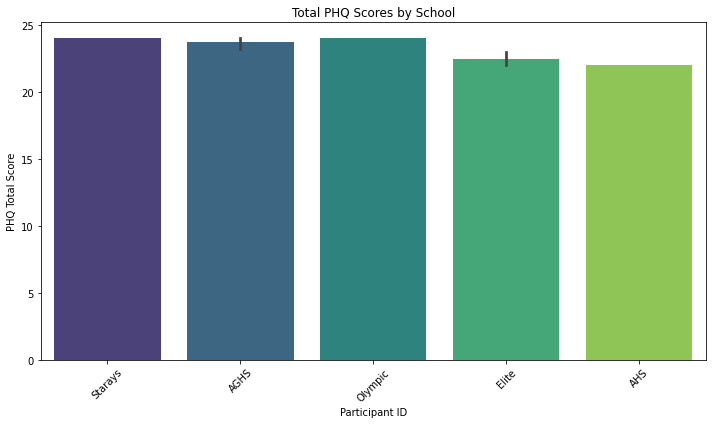

In [165]:
# Calculate PHQ total scores
df['PHQ_Total'] = df[['PHQ1', 'PHQ2', 'PHQ3', 'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8']].sum(axis=1)

# Select the top users with highest PHQ scores
top_users = df.nlargest(10, 'PHQ_Total')  # Change the number of top users as needed

# Create a bar plot for the top users with highest PHQ scores
plt.figure(figsize=(10, 6))
sns.barplot(x='School', y='PHQ_Total', data=top_users, palette='viridis')
plt.title('Total PHQ Scores by School')
plt.xlabel('Participant ID')
plt.ylabel('PHQ Total Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

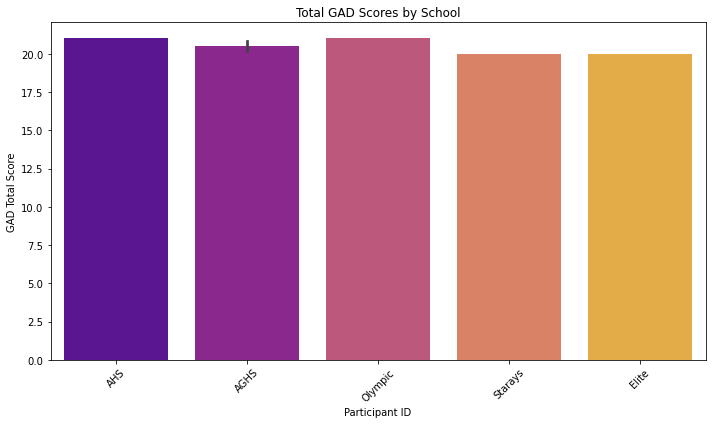

In [166]:
df['GAD_Total'] = df[['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7']].sum(axis=1)

# Select the top users with highest GAD scores
top_users_gad = df.nlargest(10, 'GAD_Total')  # Change the number of top users as needed

# Create a bar plot for the top users with highest GAD scores
plt.figure(figsize=(10, 6))
sns.barplot(x='School', y='GAD_Total', data=top_users_gad, palette='plasma')
plt.title('Total GAD Scores by School')
plt.xlabel('Participant ID')
plt.ylabel('GAD Total Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()